In [1]:
from sys import path
import numpy as np
import pandas as pd
import gensim as gs
import gensim.corpora as corpora
import scanpy as sc
import umap
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np

##topic modeling
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF#,LatentDirichletAllocation

##visualization
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

##clustering
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph

##statistics
from scipy import stats

##plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from pprint import pprint

/home/igor-server/courseWork/ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2/CodeSamples/venv/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
adata = sc.read_10x_mtx('/home/igor-server/courseWork/ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2/ExampleData/filtered_gene_bc_matrices/hg19/')

In [3]:
data1 = []
data2 = []

In [4]:
for row in sc.get.obs_df(adata).index:
    data1.append(row)

for row in sc.get.var_df(adata).index:
    data2.append(row)

print(len(data1))
print(data1)
print(len(data2))
print(data2)

2700
['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1', 'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1', 'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1', 'AAACGCTGTTTCTG-1', 'AAACTTGAAAAACG-1', 'AAACTTGATCCAGA-1', 'AAAGAGACGAGATA-1', 'AAAGAGACGCGAGA-1', 'AAAGAGACGGACTT-1', 'AAAGAGACGGCATT-1', 'AAAGATCTGGGCAA-1', 'AAAGCAGAAGCCAT-1', 'AAAGCAGATATCGG-1', 'AAAGCCTGTATGCG-1', 'AAAGGCCTGTCTAG-1', 'AAAGTTTGATCACG-1', 'AAAGTTTGGGGTGA-1', 'AAAGTTTGTAGAGA-1', 'AAAGTTTGTAGCGT-1', 'AAATCAACAATGCC-1', 'AAATCAACACCAGT-1', 'AAATCAACCAGGAG-1', 'AAATCAACCCTATT-1', 'AAATCAACGGAAGC-1', 'AAATCAACTCGCAA-1', 'AAATCATGACCACA-1', 'AAATCCCTCCACAA-1', 'AAATCCCTGCTATG-1', 'AAATGTTGAACGAA-1', 'AAATGTTGCCACAA-1', 'AAATGTTGTGGCAT-1', 'AAATTCGAAGGTTC-1', 'AAATTCGAATCACG-1', 'AAATTCGAGCTGAT-1', 'AAATTCGAGGAGTG-1', 'AAATTCGATTCTCA-1', 'AAATTGACACGACT-1', 'AAATTGACTCGCTC-1', 'AACAAACTCATTTC-1', 'AACAAACTTTCGTT-1', 'AACAATACGACGAG-1', 'AACACGTGCAGAGG-1', 'AACACGTGGAAAGT-1', 'AACACGTGGAACC

In [5]:
print(len(data1))

2700


In [6]:
print(len(data2))

32738


In [7]:
data = adata.X.transpose()
LDAModel = LDA(n_components=10, learning_method='online')
LDAOutput = LDAModel.fit_transform(data)

In [41]:
for topic_idx, topic in enumerate(LDAModel.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([data2[i]
                             for i in topic.argsort()[:-10 - 1:-1]])
        print(message)


Topic #0: DEPDC1 AC096677.1 SKI CD58 PPIAL4G SPAG17 SHCBP1L UBXN10 C1orf87 GSTM3
Topic #1: CRB1 AL161915.1 RP6-74O6.3 PLA2G2F POGZ SERBP1 GJA8 SDHB GBP5 CASQ1
Topic #2: LCE1D NSUN4 RP5-845O24.8 AL589739.1 AADACL4 AL161915.1 LAX1 RP4-694A7.2 RP11-284N8.3 RP11-336K24.12
Topic #3: FCRL1 EFCAB14-AS1 RNF11 RP11-131L23.2 CHI3L1 TXNDC12 C1orf53 ZNF684 ZNF687 PMF1
Topic #4: DHRS3 AKNAD1 RP11-543D5.1 EPHA10 CTA-134P22.2 ELAVL4 LINC01035 RP11-567C20.3 RP11-216N14.9 KCNA10
Topic #5: GLTPD1 LCE1A RP11-206L10.2 MORN1 APITD1-CORT FAM20B RXFP4 ARHGEF19-AS1 AL645608.2 FCRL2
Topic #6: PUSL1 SSR2 RP11-428K3.1 PLA2G2D DDI2 RP3-476K8.3 S100A13 BGLAP MUL1 UBIAD1
Topic #7: RP11-547I7.2 DCST1 S100PBP CC2D1B NDUFS5 RP11-266K22.2 RP4-798A10.4 SCP2 PRRC2C TRIT1
Topic #8: BMP8A CLCA1 RP5-1180E21.5 RP11-54O7.16 CTSS STRIP1 SH3D21 C1orf213 NFIA FAM138A
Topic #9: RP5-1098D14.1 C1ORF220 RP11-108M9.1 RP11-57H12.5 RP4-665J23.2 IFFO2 LDLRAD1 RP4-798A10.4 PDC SEMA6C


In [9]:
print("Perplexity: ", LDAModel.perplexity(data))

Perplexity:  2244.9687869017203


In [10]:
pprint(LDAModel.get_params())

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [11]:
print("Log Likelihood", LDAModel.score(data))

Log Likelihood -49312964.74787393


In [12]:
# Define Search Param
#search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
#lda = LDA()

# Init Grid Search Class
#model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
#model.fit(data)

In [13]:
# Best Model
#best_lda_model = model.best_estimator_

# Model Parameters
#print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
#print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
#print("Model Perplexity: ", best_lda_model.perplexity(data))

In [14]:
# Create Document - Topic Matrix
lda_output = LDAModel.transform(data)

# column names
topicnames = ["Topic" + str(i) for i in range(LDAModel.n_components)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=data2)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(30).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
MIR1302-10,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
FAM138A,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
OR4F5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
RP11-34P13.7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
RP11-34P13.8,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
AL627309.1,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.620000,0.010000,0.010000,0.010000,6
RP11-34P13.14,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
RP11-34P13.9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
AP006222.2,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,3
RP4-669L17.10,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [15]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Cell")
df_topic_distribution.columns = ['Topic Num', 'Num Сell']
df_topic_distribution

,Topic Num,Num Сell
0,0,18776
1,8,2927
2,9,2759
3,6,2499
4,3,1415
5,4,1046
6,2,1011
7,7,959
8,1,754
9,5,592


In [16]:
#import pyLDAvis
#import pyLDAvis.sklearn
#import matplotlib.pyplot as plt

#pyLDAvis.enable_notebook()
#panel = pyLDAvis.sklearn.prepare(LDAModel, data, data, mds='tsne')
#panel

In [17]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(LDAModel.components_)

# Assign Column and Index
df_topic_keywords.columns = data1
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
Topic0,608.875392,92.160987,541.480418,333.049424,0.100056,618.767318,517.466597,186.123585,477.042669,120.538405,...,77.379910,0.100029,448.852129,311.008748,100.955413,324.648998,159.398634,140.982933,170.647019,444.070462
Topic1,6.200091,43.655968,192.682797,31.038066,0.100051,300.028690,11.850025,46.976649,0.100039,0.210270,...,0.100028,2.661985,0.100249,60.015195,767.055390,81.550218,1291.655117,0.106257,0.100025,45.934037
Topic2,3.471052,1604.876458,1.197355,176.811055,16.613111,9.524044,0.100036,0.158164,223.326873,4.174712,...,696.513123,6.973160,603.429263,51.379937,1557.658453,228.415844,531.216970,761.775126,490.909959,0.100029
Topic3,233.752083,54.995583,342.933201,18.964050,739.110093,110.408640,375.368944,295.304543,272.864977,11.706335,...,7.837506,6.799697,7.660229,99.094430,590.982488,28.215726,51.211181,0.100029,96.138889,0.101856
Topic4,1.675036,60.000783,58.664557,734.116251,16.968195,62.621810,0.100030,2.412010,0.100030,692.200698,...,29.412436,256.454037,0.100030,216.286994,166.211410,66.094859,46.110021,19.553146,29.828948,71.931994


In [18]:
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer)
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=data1, lda_model=LDAModel, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Gene '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Gene 0,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,Gene 10,Gene 11,Gene 12,Gene 13,Gene 14
Topic 0,CGATCAGAGGTACT-1,TTCAGTACTCAAGC-1,AAGCACTGGTTCTT-1,GATAGAGACTGTGA-1,GCACCTACGCGATT-1,GATCGAACCGAGAG-1,TGCTAGGATAGTCG-1,AGAGTGCTGTCATG-1,CCTCGAACTTACTC-1,GAAGGTCTGTTGCA-1,CTTTGATGTGTCCC-1,TGATTAGATGCTAG-1,AGAATTTGTAACCG-1,GCCGTACTACCTGA-1,CGACAAACCCATAG-1
Topic 1,TTACTCGAACGTTG-1,CCAGTCTGCGGAGA-1,GCGAAGGAGAGCTT-1,AGAGGTCTACAGCT-1,GGCACGTGTGAGAA-1,CGATACGACAGGAG-1,GCCTCAACTCTTTG-1,ACTTCAACAAGCAA-1,CTAGGATGAGCCTA-1,TACTGTTGCTGAAC-1,ACGTCGCTCCTGAA-1,GGCATATGTGTGAC-1,TGACGCCTGTACCA-1,TATGGGTGCATCAG-1,CACCGGGACTTCTA-1
Topic 2,GGGCCAACCTTGGA-1,CAGGTTGAGGATCT-1,ACGAGGGACAGGAG-1,AAGCCATGAACTGC-1,ACGAAGCTCTGAGT-1,CCAGTCTGCGGAGA-1,TTGAGGACTACGCA-1,CGATCAGATGTGAC-1,GACATTCTCCACCT-1,GTTAACCTTGCTTT-1,AGCACTGATGCTTT-1,AAGCACTGGTTCTT-1,ATACCGGAATGCTG-1,GAAAGTGAAAGTGA-1,TTATGGCTTATGGC-1
Topic 3,TAATGCCTCGTCTC-1,CAGTTTACACACGT-1,CATTACACCAACTG-1,CTAAACCTCTGACA-1,TTCTGATGGAGACG-1,CATTTCGAGATACC-1,TTACTCGATCTACT-1,CAATCTACTGACTG-1,GGCAAGGAAAAAGC-1,GTTGACGATATCGG-1,AAGATTACCTCAAG-1,TGCACAGACGACAT-1,CACCGGGACTTCTA-1,TTGTCATGGACGGA-1,TCAACACTGTTTGG-1
Topic 4,ACGAACTGGCTATG-1,GAAACCTGGACTAC-1,CATCAGGATCCTAT-1,ATTGCACTTGCTTT-1,TACGCCACTCCCAC-1,CATGCGCTAGTCAC-1,TGTACTTGCTCTAT-1,CATGCGCTTTGCAG-1,GTACCCTGACAGTC-1,GACAGTACTTCGGA-1,GAAAGATGCTGATG-1,ATTTAGGAACCATG-1,TATAAGTGTGGTGT-1,ACAGCAACCTCAAG-1,GGGAACGAAGCTCA-1
Topic 5,AACCTTACGAGACG-1,GGGCCAACTCCAAG-1,AAAGTTTGGGGTGA-1,AAGCCAACGTGTTG-1,ACCACGCTGCTGTA-1,TGAGACACAAGGTA-1,GTTAAATGTCGACA-1,ACTAGGTGGAACTC-1,AAATCAACCCTATT-1,TAATGCCTCATGAC-1,GGCACGTGTGAGAA-1,GCACCACTCATGAC-1,TGATCACTTCTACT-1,AACAAACTCATTTC-1,TGACCGCTCTGCAA-1
Topic 6,AACCTACTGTGAGG-1,GTTAGGTGCCAGTA-1,TGACTTACAGTCTG-1,AGAGCGGAGGCAAG-1,ACGTGATGCCATGA-1,AGTTATGAACAGTC-1,GTAACGTGACCTCC-1,GTTGAGTGGTCTTT-1,AGATATTGGCCAAT-1,ACCCAGCTGTTAGC-1,TAGGTTCTTGCTGA-1,ACAAGAGAAGTCGT-1,CGAGGCACTATGCG-1,TGAGGACTCTCATT-1,AAGATGGAGATAAG-1
Topic 7,TGTAGTCTTCCAGA-1,GTCCACTGACCTCC-1,ATGAGCACACAGCT-1,CATTTGTGGGATCT-1,CAAATATGTGACAC-1,ATCCGCACGCATCA-1,ACTCTCCTGCATAC-1,CCAAGTGAGGAACG-1,TCGATTTGTCGTGA-1,CAAGACTGACCTGA-1,AAGCACTGAGCAAA-1,CGCGAGACGCTACA-1,CATTTGTGACGACT-1,CACTAGGATGATGC-1,AATGTAACGGTGGA-1
Topic 8,CAACCAGAAGTGCT-1,CTAAGGACCGTTAG-1,GACCTCTGCATCAG-1,AAATCAACGGAAGC-1,GGACGCTGCTAGCA-1,GAAGTCTGTTCTGT-1,ATTCAAGAACGGGA-1,AGCTGAACCTCTCG-1,CCTGACTGGGGAGT-1,AAACATTGAGCTAC-1,CACTGCTGGAAAGT-1,TCGGACCTGTACAC-1,AGGATAGACATTTC-1,AATCTAGAATCGGT-1,CGTAACGATCGCCT-1
Topic 9,TGACTTACACACCA-1,TGACTGGATTCTCA-1,ACTGTGGATCTAGG-1,CTGAACGACAGTCA-1,CTATACTGTTCGTT-1,AGAAGATGTGACTG-1,CCAGGTCTATGGTC-1,ACTCTCCTGCATAC-1,TGGTAGACATGCCA-1,GGATACTGTCTAGG-1,ACAGACACGTTGTG-1,CAGCAATGCCTTCG-1,GCCAAATGATCGAC-1,GCATTGGAGAAGGC-1,TGGAAAGAGCGATT-1


In [19]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
clusters = KMeans(n_clusters=10, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.37  0.25  0.28  0.33  0.29  0.22  0.39  0.26  0.38  0.37]
 [-0.32 -0.02 -0.03 -0.07  0.14 -0.    0.83 -0.01 -0.4  -0.15]]
Perc of Variance Explained: 
 [0.   0.17]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

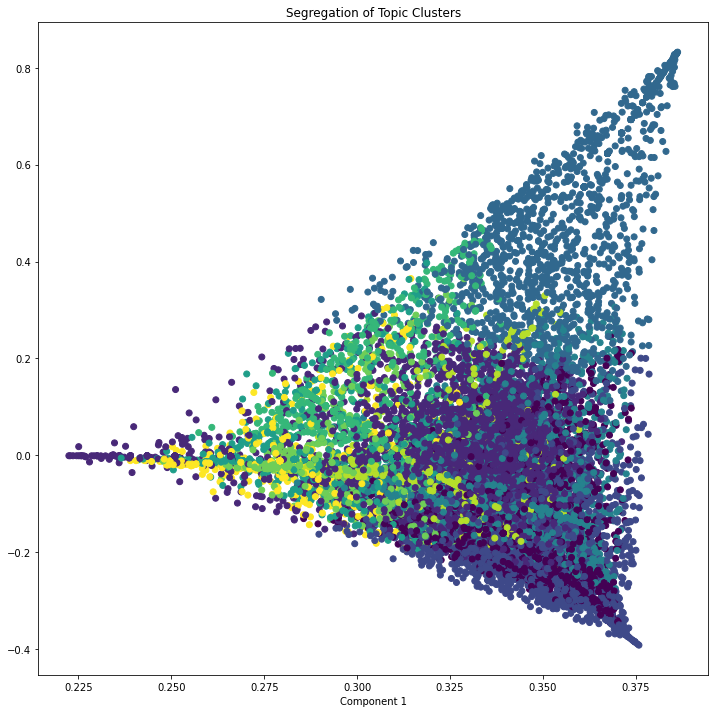

In [20]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis.sklearn

vectorizer = CountVectorizer()
pyLDAvis.enable_notebook()
vectorizer.fit_transform(data1)
panel = pyLDAvis.sklearn.prepare(LDAModel, data, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  18.664680
0       0.648955  71.707100       2        1  17.522486
9      71.019684   9.971006       3        1  15.292428
6       3.785981  33.185135       4        1  15.014338
3     -42.666500  -9.222070       5        1   7.436958
4      -3.621689 -43.526516       6        1   7.432979
2      -3.632402  -4.171708       7        1   5.925158
7     -36.584400  35.804413       8        1   5.856202
1      44.391380  50.615383       9        1   3.693751
5      40.235809 -31.591665      10        1   3.161021, topic_info=                Term          Freq         Total Category  logprob  loglift
2567  ttactcgaacgttg  15517.000000  15517.000000  Default  30.0000  30.0000
1059  ccagtctgcggaga  16064.000000  16064.000000  Default  29.0000  29.0000
1761  gcgaaggagagctt  10658.000000  10658.000000  Default  28.0000  28.0000
426   agaggtctacagct  11010.000000  11010.000000  Default  27.0000  27.0000
1877  ggcacgtgtgagaa  10551.000000  10551.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
28    aaatcaaccctatt    946.490674   5855.592318  Topic10  -5.3633   1.6319
1877  ggcacgtgtgagaa    889.484683  10551.772656  Topic10  -5.4254   0.9809
1641  gatatatgtggagg    719.752668   3780.477879  Topic10  -5.6372   1.7956
1937  gggtaactcagcta    697.527944   3395.822473  Topic10  -5.6685   1.8715
645   atcatgctgaacct    691.733254   3187.235614  Topic10  -5.6769   1.9266

[565 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1         1  0.414171  aaacattgagctac
1         2  0.017790  aaacattgagctac
1         3  0.164709  aaacattgagctac
1         4  0.012193  aaacattgagctac
1         5  0.010394  aaacattgagctac
...     ...       ...             ...
2696      6  0.012425  tttctactgaggca
2696      7  0.150540  tttctactgaggca
2696      8  0.075992  tttctactgaggca
2696      9  0.368116  tttctactgaggca
2696     10  0.016759  tttctactgaggca

[4393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 10, 7, 4, 5, 3, 8, 2, 6])

In [46]:
#adata2 = sc.read_10x_mtx('/home/igor-server/courseWork/ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2/TestData/blood/')

In [47]:
#data_new = adata2.X.transpose()
#topic_probability_scores = LDAModel.transform(data_new)
#topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
#print(topic)

ValueError: The provided data has 20 dimensions while the model was trained with feature size 2700.

In [27]:
#dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
#doc_ids = np.argsort(dists)[:top_n]
#print("Topic KeyWords: ", topic)
#print("Topic Prob Scores of text: ", np.round(topic_probability_scores, 1))
#print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))

In [45]:
#LDAMODELSAVE
import joblib

joblib.dump(LDAModel, 'lda_model.jl')
# then reload it with
lda_model = joblib.load('lda_model.jl')

Topic #0: DEPDC1 AC096677.1 SKI CD58 PPIAL4G SPAG17 SHCBP1L UBXN10 C1orf87 GSTM3
Topic #1: CRB1 AL161915.1 RP6-74O6.3 PLA2G2F POGZ SERBP1 GJA8 SDHB GBP5 CASQ1
Topic #2: LCE1D NSUN4 RP5-845O24.8 AL589739.1 AADACL4 AL161915.1 LAX1 RP4-694A7.2 RP11-284N8.3 RP11-336K24.12
Topic #3: FCRL1 EFCAB14-AS1 RNF11 RP11-131L23.2 CHI3L1 TXNDC12 C1orf53 ZNF684 ZNF687 PMF1
Topic #4: DHRS3 AKNAD1 RP11-543D5.1 EPHA10 CTA-134P22.2 ELAVL4 LINC01035 RP11-567C20.3 RP11-216N14.9 KCNA10
Topic #5: GLTPD1 LCE1A RP11-206L10.2 MORN1 APITD1-CORT FAM20B RXFP4 ARHGEF19-AS1 AL645608.2 FCRL2
Topic #6: PUSL1 SSR2 RP11-428K3.1 PLA2G2D DDI2 RP3-476K8.3 S100A13 BGLAP MUL1 UBIAD1
Topic #7: RP11-547I7.2 DCST1 S100PBP CC2D1B NDUFS5 RP11-266K22.2 RP4-798A10.4 SCP2 PRRC2C TRIT1
Topic #8: BMP8A CLCA1 RP5-1180E21.5 RP11-54O7.16 CTSS STRIP1 SH3D21 C1orf213 NFIA FAM138A
Topic #9: RP5-1098D14.1 C1ORF220 RP11-108M9.1 RP11-57H12.5 RP4-665J23.2 IFFO2 LDLRAD1 RP4-798A10.4 PDC SEMA6C
